In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#Read in csv file
df = pd.read_csv("election_data.csv")

#Filter for 2012 and 2016
df_2012 = df[df["year"] == 2012]
df_2016 = df[df["year"] == 2016]
df_2016.columns

Index(['year', 'state', 'state_po', 'county', 'FIPS', 'office', 'candidate',
       'party', 'candidatevotes', 'totalvotes', 'version'],
      dtype='object')

In [41]:
#Create pivot table with candidates as columns and votes as vales
pivot_2012 = df_2012.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2012 dataframe
merged_2012 = df_2012.merge(pivot_2012, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2012 = merged_2012.groupby(["state", "state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2012 = merged_grouped_2012.iloc[:,-3:].astype(int)

#Create total votes column
election_2012["Total Votes"] = election_2012.sum(1)

#Create column for winner and margin of victory
election_2012["Winner"] = np.where(election_2012['Barack Obama']>election_2012["Mitt Romney"], 'Barack Obama', 'Mitt Romney')
election_2012["Margin"] = np.where(election_2012["Winner"]=="Mitt Romney", 
                                   election_2012["Mitt Romney"]-election_2012["Barack Obama"],
                                   election_2012["Barack Obama"]-election_2012["Mitt Romney"])
#Preview results
election_2012.head()


Barack Obama  Mitt Romney  Other  Total Votes  \
state   state_po county                                                   
Alabama AL       Autauga          6363        17379    190        23932   
                 Baldwin         18424        66016    898        85338   
                 Barbour          5912         5550     47        11509   
                 Bibb             2202         6132     86         8420   
                 Blount           2970        20757    279        24006   

                                Winner  Margin  
state   state_po county                         
Alabama AL       Autauga   Mitt Romney   11016  
                 Baldwin   Mitt Romney   47592  
                 Barbour  Barack Obama     362  
                 Bibb      Mitt Romney    3930  
                 Blount    Mitt Romney   17787

In [42]:
#Find total votes for Barack Obama 2012
obama_total = election_2012["Barack Obama"].sum()

#Find total votes for Mitt Romney 2012
romney_total = election_2012["Mitt Romney"].sum()

#Find total votes for Other 2012
other_2012_total = election_2012["Other"].sum()


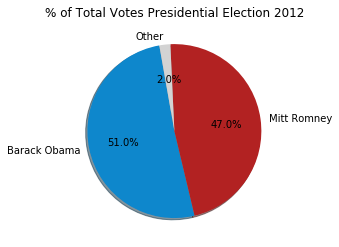

In [43]:
#Add labels
labels_2012 = ["Barack Obama", "Mitt Romney", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2012")

#Set the values of each section of the pie chart
sizes_2012 = [obama_total, romney_total, other_2012_total]

#Set the colors of each section of the pie chart
colors_2012 = ["#0e87cc", "firebrick", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2012, labels=labels_2012, colors=colors_2012,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [44]:
#Create pivot table with candidates as columns and votes as vales
pivot_2016 = df_2016.pivot(columns = "candidate", values = "candidatevotes")

#Merge pivot table with original 2016 dataframe
merged_2016 = df_2016.merge(pivot_2016, right_index=True, left_index=True)

#Group by state and county and sum (this allows all votes to be on same row)
merged_grouped_2016 = merged_2016.groupby(["state","state_po", "county"]).sum()

#Select last three rows and transform to ints
election_2016 = merged_grouped_2016.iloc[:,-3:].astype(int)

#Create total votes column
election_2016["Total Votes"] = election_2016.sum(1)

#Create column for winner and margin of victory
election_2016["Winner"] = np.where(election_2016['Hillary Clinton']>election_2016["Donald Trump"], 'Hillary Clinton', 'Donald Trump')
election_2016["Margin"] = np.where(election_2016["Winner"]=="Donald Trump", 
                                   election_2016["Donald Trump"]-election_2016["Hillary Clinton"],
                                   election_2016["Hillary Clinton"]-election_2016["Donald Trump"])
#Preview results
election_2016.head()


Donald Trump  Hillary Clinton  Other  Total Votes  \
state   state_po county                                                       
Alabama AL       Autauga         18172             5936    865        24973   
                 Baldwin         72883            18458   3874        95215   
                 Barbour          5454             4871    144        10469   
                 Bibb             6738             1874    207         8819   
                 Blount          22859             2156    573        25588   

                                Winner  Margin  
state   state_po county                         
Alabama AL       Autauga  Donald Trump   12236  
                 Baldwin  Donald Trump   54425  
                 Barbour  Donald Trump     583  
                 Bibb     Donald Trump    4864  
                 Blount   Donald Trump   20703

In [45]:
#Find total votes for Donald Trump 2016
trump_total = election_2016["Donald Trump"].sum()

#Find total votes for Hillary Clinton 2016
clinton_total = election_2016["Hillary Clinton"].sum()

#Find total votes for Other 2016
other_2016_total = election_2016["Other"].sum()

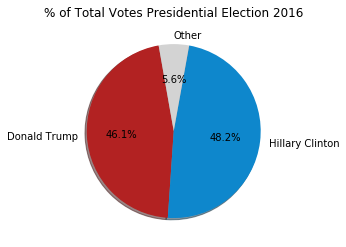

In [46]:
#Add labels
labels_2016 = ["Donald Trump", "Hillary Clinton", "Other"]

#Add title
plt.title("% of Total Votes Presidential Election 2016")

#Set the values of each section of the pie chart
sizes_2016 = [trump_total, clinton_total, other_2016_total]

#Set the colors of each section of the pie chart
colors_2016 = ["firebrick", "#0e87cc", "lightgray" ]

# Create the pie chart based upon the values above
plt.pie(sizes_2016, labels=labels_2016, colors=colors_2016,
        autopct="%1.1f%%", shadow=True, startangle=100)

#Show pie chart
plt.show()

In [56]:
#Join 2012 and 2016 dataframes
election_df = election_2012.join(election_2016, rsuffix = "_2016", lsuffix="_2012")

#Create column for percent change between total votes in 2012 and 2016
election_df["Total_Votes_Percent_Change"] = round((election_df["Total Votes_2016"] - election_df["Total Votes_2012"]) / election_df["Total Votes_2012"] * 100,2)

#Show results
election_df.head(10)

#export as CSV
election_df.reset_index().to_csv("2012_2016_election.csv")

Barack Obama  Mitt Romney  Other_2012  \
state     state_po county                                               
Alabama   AL       Autauga              6363        17379         190   
                   Baldwin             18424        66016         898   
                   Barbour              5912         5550          47   
                   Bibb                 2202         6132          86   
                   Blount               2970        20757         279   
                   Bullock              4061         1251          10   
                   Butler               4374         5087          35   
                   Calhoun             15511        30278         468   
                   Chambers             6871         7626         114   
                   Cherokee             2132         7506         141   
                   Chilton              3397        13932         133   
                   Choctaw              3786         4152          30   
                   Clarke               6334         7470          47   
                   Clay                 1777         4817          68   
                   Cleburne              971         5272          62   
                   Coffee               4925        14666         179   
                   Colbert              9166        13936         283   
                   Conecuh              3555         3439          28   
                   Coosa                2191         3049          29   
                   Covington            3158        12153         112   
                   Crenshaw             2050         4331          37   
                   Cullman              5052        28999         406   
                   Dale                 5286        13108         163   
                   Dallas              14612         6288          53   
                   DeKalb               5239        18331         293   
                   Elmore               8954        26253         278   
                   Escambia             5489         9287          93   
                   Etowah              12803        29130         597   
                   Fayette              1817         6054          75   
                   Franklin             3171         7567         121   
...                                      ...          ...         ...   
Wisconsin WI       Washburn             4447         4699         141   
                   Washington          23166        54765         811   
                   Waukesha            78779       162798        2279   
                   Waupaca             11578        17002         260   
                   Waushara             5335         6562         151   
                   Winnebago           45449        42122        1602   
                   Wood                18581        19704         615   
Wyoming   WY       Albany               7458         7866         976   
                   Big Horn              868         4285         171   
                   Campbell             2163        14953         455   
                   Carbon               2110         4148         251   
                   Converse             1089         5043         211   
                   Crook                 426         3109         150   
                   Fremont              5333        11075         531   
                   Goshen               1458         4178         170   
                   Hot Springs           523         1895          97   
                   Johnson               749         3363         147   
                   Laramie             14295        23904        1306   
                   Lincoln              1287         7144         187   
                   Natrona              8961        22132        1280   
                   Niobrara              200         1022          54   
                   Park                 2927        11234         447   
                 

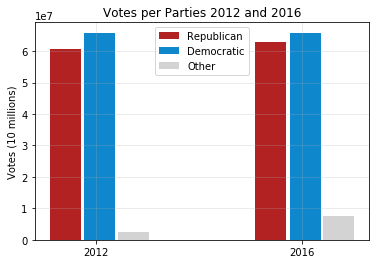

In [48]:
republican = (romney_total, trump_total)
democratic = (obama_total, clinton_total)
other = (other_2012_total, other_2016_total)

#The x locations for the groups
ind = np.arange(len(democratic)) 

#The width of the bars
width = 0.15  

#Create the bars
fig, ax = plt.subplots()
rects1 = plt.bar(ind - width, republican, width, label='Republican', color="firebrick")
rects2 = plt.bar(ind + width/9, democratic, width, label='Democratic', color="#0e87cc")
rects3 = plt.bar(ind + width*1.2, other, width, label='Other', color="lightgray")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Votes (10 millions)')
plt.title('Votes per Parties 2012 and 2016')

#Add legend
plt.legend(loc= "upper center")

#Add grid
plt.grid(alpha= 0.3)

#Set ticks
plt.xticks(ind)

#Add tick labels
ax.set_xticklabels(('2012', '2016'))

#Show bar chart
plt.show()

In [49]:
#Store number of counties that changed parties between 2012 and 2016
Dem_Rep = len(election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")])
Rep_Dem = len(election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")])

#NEED TO CREATE A CHART HERE

In [50]:
#Create dataframe for counties than switched
rep_dem_df = election_df[(election_df.Winner_2012 == "Mitt Romney") & (election_df.Winner_2016 == "Hillary Clinton")]
dem_rep_df = election_df[(election_df.Winner_2012 == "Barack Obama") & (election_df.Winner_2016 == "Donald Trump")]

In [72]:
#Read in demographic data
demo_df = pd.read_csv("demographic_data.csv")

#Split data in county on the comma, replace "county" with ""
demo_df['county'] = demo_df['county'].str.split(',').str[0]
demo_df["county"] = demo_df.county.str.replace(" County", "",)

#Group data, export if necessary
grouped_demo = demo_df.groupby(["state", "county"]).sum()
#grouped_demo.reset_index().to_csv("grouped_demo.csv")

#Read in income and poverty data
income_df = pd.read_csv("income_data.csv")

#Replace "Parish" with ""
income_df["Name"] = income_df.Name.str.replace(" Parish", "")

#Replace "County" with ""
income_df["Name"] = income_df.Name.str.replace(" County", "")

#Replace "city" with ""
income_df["Name"] = income_df.Name.str.replace(" city", "")

income_df = income_df[["Postal Code", "Name", "Poverty Percent, All Ages", "Median Household Income"]]


In [57]:
#Read in clean data
election = pd.read_csv("2012_2016_election.csv")
demographics = pd.read_csv("demo_clean.csv")

#Replace "Parish" with ""
demographics["county"] = demographics.county.str.replace(" Parish", "")


In [98]:
#Merge dataframes
election_merged = pd.merge(election, demographics)
#election_merged = pd.merge(election_merged, income_df)

#Make new columns for dem/rep percent change
election_merged["Dem_Votes_Percent_Change"] = round((election_merged["Hillary Clinton"] - election_merged["Barack Obama"]) / election_merged["Barack Obama"] * 100,2)
election_merged["Rep_Votes_Percent_Change"] = round((election_merged["Donald Trump"] - election_merged["Mitt Romney"]) / election_merged["Mitt Romney"] * 100,2)

#dem_rep_df.reset_index(inplace=True)
election_merged.rename(columns={"state_po":"Postal Code"}, inplace=True)
income_df.rename(columns={"Name":"county"}, inplace=True)

election_merged = pd.merge(election_merged, income_df)
election_merged["Median Household Income"] = election_merged["Median Household Income"].str.replace(",","")
election_merged["Median Household Income"] = election_merged["Median Household Income"].astype("int")
election_merged["Poverty Percent, All Ages"] = election_merged["Poverty Percent, All Ages"].astype("float")

In [65]:
election_merged.rename(columns={"state_po":"Postal Code"}, inplace=True)

In [26]:
total_count = election_merged.state.value_counts()
population = election_merged.groupby("state")["total_population"].sum()
switched_count = dem_rep_df.state.value_counts()

switch = pd.DataFrame({
    "switched": switched_count,
    "total":total_count,
    "population":population.apply(lambda x: f"{x:,.0f}")
})

switch.dropna(inplace=True)
switch["%_Change"] = round(switch.switched / switch.total * 100,2)
switch.sort_values("%_Change", ascending=False, inplace=True)

switch.head()

switched  total  population  %_Change
Maine           8.0   16.0   1,322,366     50.00
New York       22.0   62.0  19,400,982     35.48
Delaware        1.0    3.0     880,882     33.33
Iowa           32.0   99.0   3,012,594     32.32
Wisconsin      23.0   72.0   5,643,185     31.94

In [32]:
age_bins = [0, 34, 40, 45, 100]
age_names = ["<35", "36-40", "41-45", "$46+"]

election_merged["Age Ranges"] = pd.cut(election_merged["median_age"], age_bins, labels = age_names)

election_merged["Age Ranges"].value_counts()


36-40    1286
41-45    1080
$46+      419
<35       316
Name: Age Ranges, dtype: int64

In [37]:
election_merged.median_earnings_2010_dollars.describe()

count     3101.000000
mean     25433.401862
std       5025.218028
min          0.000000
25%      22326.548260
50%      24798.574610
75%      27531.070160
max      56674.350800
Name: median_earnings_2010_dollars, dtype: float64

In [36]:
election_merged.columns

Index(['state', 'county', 'Barack Obama', 'Mitt Romney', 'Other_2012',
       'Total Votes_2012', 'Winner_2012', 'Margin_2012', 'Donald Trump',
       'Hillary Clinton', 'Other_2016', 'Total Votes_2016', 'Winner_2016',
       'Margin_2016', 'Total_Votes_Percent_Change', 'median_age',
       'unemployment', 'total_population', 'graduate_degree',
       'at_least_bachelor_s_degree', 'at_least_high_school_diploma',
       'less_than_high_school', 'median_earnings_2010_dollars', 'white',
       'black', 'hispanic', 'asian',
       'farming_fishing_and_forestry_occupations',
       'construction_extraction_maintenance_and_repair_occupations',
       'management_professional_and_related_occupations',
       'production_transportation_and_material_moving_occupations',
       'sales_and_office_occupations', 'service_occupations',
       'Dem_Votes_Percent_Change', 'Rep_Votes_Percent_Change', 'Age Ranges'],
      dtype='object')